In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import scipy
import functools as ft

/var/folders/bw/gsv3gt2x15sb89wp_ddgg1ph0000gn/T/ipykernel_15602/2225463243.py:29: RuntimeWarning: divide by zero encountered in matmul
  U_Nt = np.matmul(U_Nt, u1)
/var/folders/bw/gsv3gt2x15sb89wp_ddgg1ph0000gn/T/ipykernel_15602/2225463243.py:29: RuntimeWarning: overflow encountered in matmul
  U_Nt = np.matmul(U_Nt, u1)
/var/folders/bw/gsv3gt2x15sb89wp_ddgg1ph0000gn/T/ipykernel_15602/2225463243.py:29: RuntimeWarning: invalid value encountered in matmul
  U_Nt = np.matmul(U_Nt, u1)
/var/folders/bw/gsv3gt2x15sb89wp_ddgg1ph0000gn/T/ipykernel_15602/2225463243.py:30: RuntimeWarning: divide by zero encountered in matmul
  U_Nt = np.matmul(U_Nt, u2)
/var/folders/bw/gsv3gt2x15sb89wp_ddgg1ph0000gn/T/ipykernel_15602/2225463243.py:30: RuntimeWarning: overflow encountered in matmul
  U_Nt = np.matmul(U_Nt, u2)
/var/folders/bw/gsv3gt2x15sb89wp_ddgg1ph0000gn/T/ipykernel_15602/2225463243.py:30: RuntimeWarning: invalid value encountered in matmul
  U_Nt = np.matmul(U_Nt, u2)
/var/folders/bw/gsv3gt2x

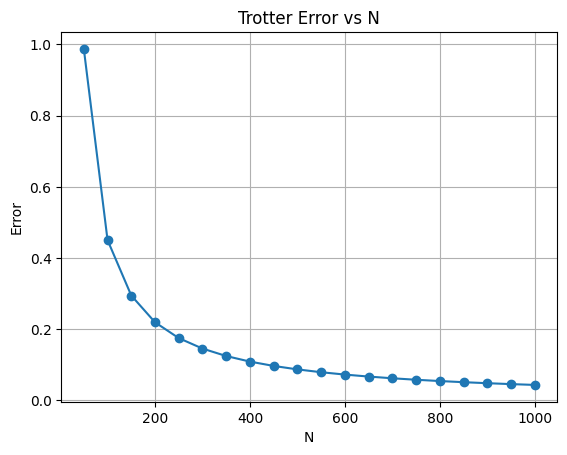

In [20]:
np.set_printoptions(threshold=np.inf)

def error(N, t=10):
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    I = np.identity(2)
    
    X1X2 = ft.reduce(np.kron, [X, X, I, I])
    Y1Y2 = ft.reduce(np.kron, [Y, Y, I, I])
    X2X3 = ft.reduce(np.kron, [I, X, X, I])
    Y2Y3 = ft.reduce(np.kron, [I, Y, Y, I])
    X3X4 = ft.reduce(np.kron, [I, I, X, X])
    Y3Y4 = ft.reduce(np.kron, [I, I, Y, Y])

    H = X1X2 + Y1Y2 + X2X3 + Y2Y3 + X3X4 + Y3Y4

    time_evol_op = scipy.linalg.expm(-1j * t * H)

    # U_N(t) = (e^{-i t/N X1X2 }e^{-i t/N Y1Y2 }e^{-i t/N X2X3 }e^{-i t/N Y2Y3 }e^{-i t/N X3X4 }e^{-i t/N Y3Y4 })^N.
    
    U_Nt = np.identity(16, dtype=complex)
    u1 = scipy.linalg.expm(-1j * t/N * X1X2)
    u2 = scipy.linalg.expm(-1j * t/N * Y1Y2)
    u3 = scipy.linalg.expm(-1j * t/N * X2X3)
    u4 = scipy.linalg.expm(-1j * t/N * Y2Y3)
    u5 = scipy.linalg.expm(-1j * t/N * X3X4)
    u6 = scipy.linalg.expm(-1j * t/N * Y3Y4)
    for _ in range(N):
        U_Nt = np.matmul(U_Nt, u1)
        U_Nt = np.matmul(U_Nt, u2)
        U_Nt = np.matmul(U_Nt, u3)
        U_Nt = np.matmul(U_Nt, u4)
        U_Nt = np.matmul(U_Nt, u5)
        U_Nt = np.matmul(U_Nt, u6)

    return scipy.linalg.norm(time_evol_op - U_Nt)

all = []
n_values = range(50, 1001, 50)
for n in n_values:
    all.append(error(n))
plt.plot(n_values, all, marker='o')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Trotter Error vs N')
plt.grid()
plt.show()